In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trainDir = os.path.join('/content/drive/MyDrive/RM_4')

In [ ]:
filePath = '/content/drive/My Drive/RM_4/train.csv'
data = pd.read_csv(filePath)
# data = pd.read_csv('train.csv')

# EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


dari data diatas terdapat 165034 data tidak ada null sama sekali

In [ ]:
data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [ ]:
data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
# data.hist()
# plt.rcParams['figure.figsize'] = [16, 12]
# plt.show()

In [ ]:
# sb.pairplot(data)

In [ ]:
# sb.boxplot(data)

In [ ]:
print(f'data NaN: \n{data.isna().sum()}\n')
print(f'data null: \n{data.isnull().sum()}\n')
print(f'data duplicates: \n{data.duplicated().sum()}\n')

data NaN: 
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

data null: 
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

data duplicates: 
0



In [ ]:
counts_data = data['CustomerId'].value_counts()
counts_data

,count
CustomerId,
15682355,121
15570194,99
15585835,98
15595588,91
15648067,90
...,...
15635203,1
15806982,1
15691104,1


# Preprocessing

## Drop Column unique

In [ ]:
data = data.drop(['id','CustomerId','Surname'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


## Convert type float to int

In [ ]:
data['Age'] = data['Age'].astype(int)
data['HasCrCard'] = data['HasCrCard'].astype(int)
data['IsActiveMember'] = data['IsActiveMember'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  int64  
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  int64  
 8   IsActiveMember   165034 non-null  int64  
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 13.9+ MB


## Feature Engineering

### Age Grouping

In [ ]:
# age_bins = [0, 20, 40, 60, 80, float('inf')]
# age_labels = ['Youth', 'Young Adult', 'Adult', 'Senior', 'Elderly']
# data['AgeCategory'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
# data['AgeCategory'] = data['AgeCategory'].astype(object)

In [ ]:
# data

### Interaction Terms

In [ ]:
# data['CreditScore_Balance'] = data['CreditScore'] * data['Balance']
# data['CreditScore_EstimatedSalary'] = data['CreditScore'] * data['EstimatedSalary']
# data['Balance_EstimatedSalary'] = data['Balance'] * data['EstimatedSalary']

In [ ]:
# data

## Encode

In [ ]:
data_numerikal = data.select_dtypes(exclude=object)
data_kategorikal = data.select_dtypes(include=object)

encoder = LabelEncoder()

for col in data_kategorikal:
  data[col] = encoder.fit_transform(data[col])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  int64  
 2   Gender           165034 non-null  int64  
 3   Age              165034 non-null  int64  
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  int64  
 8   IsActiveMember   165034 non-null  int64  
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 13.9 MB


In [ ]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33,3,0.00,2,1,0,181449.97,0
1,627,0,1,33,1,0.00,2,1,1,49503.50,0
2,678,0,1,40,10,0.00,2,1,0,184866.69,0
3,581,0,1,34,2,148882.54,1,1,1,84560.88,0
4,716,2,1,33,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,2,0,33,2,0.00,1,1,1,131834.75,0
165030,792,0,1,35,3,0.00,1,0,0,131834.45,0
165031,565,0,1,31,5,0.00,1,1,1,127429.56,0
165032,554,2,0,30,7,161533.00,1,0,1,71173.03,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  int64  
 2   Gender           165034 non-null  int64  
 3   Age              165034 non-null  int64  
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  int64  
 8   IsActiveMember   165034 non-null  int64  
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 13.9 MB


## Normalization

In [ ]:
# numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# scaler = MinMaxScaler()

# data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [ ]:
# data

In [ ]:
# data.hist()
# plt.rcParams['figure.figsize'] = [16, 12]
# plt.show()

## Remove Outlier

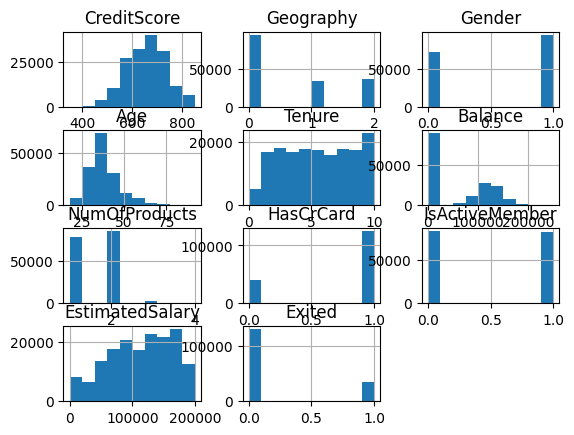

In [ ]:
data.hist()
plt.rcParams['figure.figsize'] = [16, 12]
plt.show()

<Axes: >

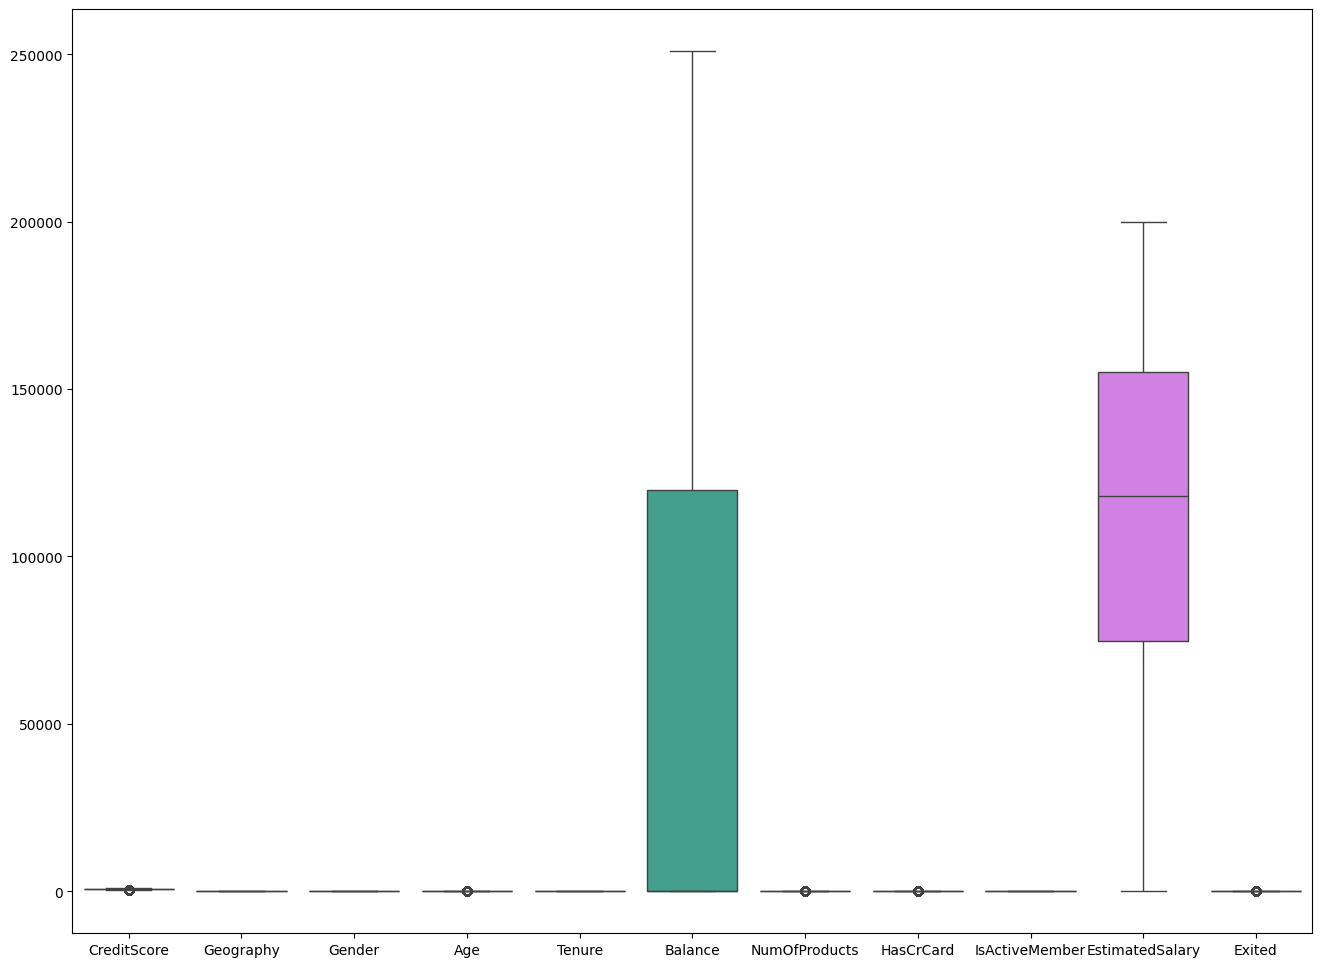

In [ ]:
sb.boxplot(data)

In [ ]:
data['Exited'].value_counts()

,count
Exited,
0,130113
1,34921


In [ ]:
Q3 = data['CreditScore'].quantile(0.75)
Q1 = data['CreditScore'].quantile(0.25)
IQR = Q3-Q1
LB = Q1 - (IQR * 1.5)
UB = Q3 + (IQR * 1.5)

temp = data[data['CreditScore']<=LB]
temp['Exited'].value_counts()

,count
Exited,
0,196
1,57


In [ ]:
data['Exited'].value_counts()

,count
Exited,
0,130113
1,34921


In [ ]:
data = data[data['CreditScore']>LB]

In [ ]:
Q3 = data['Age'].quantile(0.75)
Q1 = data['Age'].quantile(0.25)
IQR = Q3-Q1
LB = Q1 - (IQR * 1.5)
UB = Q3 + (IQR * 1.5)

temp = data[data['Age'] >= UB]
temp['Exited'].value_counts()

,count
Exited,
0,4392
1,2973


In [ ]:
data = data[data['Age'] < UB]

In [ ]:
data['Exited'].value_counts()

,count
Exited,
0,125525
1,31891


In [ ]:
# Q3 = data['Balance_EstimatedSalary'].quantile(0.75)
# Q1 = data['Balance_EstimatedSalary'].quantile(0.25)
# IQR = Q3-Q1
# LB = Q1 - (IQR * 1.5)
# UB = Q3 + (IQR * 1.5)

# temp = data[data['Balance_EstimatedSalary'] >= UB]
# temp['Exited'].value_counts()

In [ ]:
# data = data[data['Balance_EstimatedSalary'] < UB]

In [ ]:
# sb.boxplot(data)

In [ ]:
# data.hist()
# plt.rcParams['figure.figsize'] = [16, 12]
# plt.show()

## Standarisasi

In [ ]:
# columns_to_standardize = [
#     'CreditScore', 'Age', 'Tenure', 'Balance',
#     'NumOfProducts', 'EstimatedSalary',
#     'CreditScore_Balance', 'CreditScore_EstimatedSalary', 'Balance_EstimatedSalary'
# ]

# scaler = StandardScaler()

# data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

In [ ]:
# data.hist()
# plt.rcParams['figure.figsize'] = [16, 12]
# plt.show()

# Feature Selection

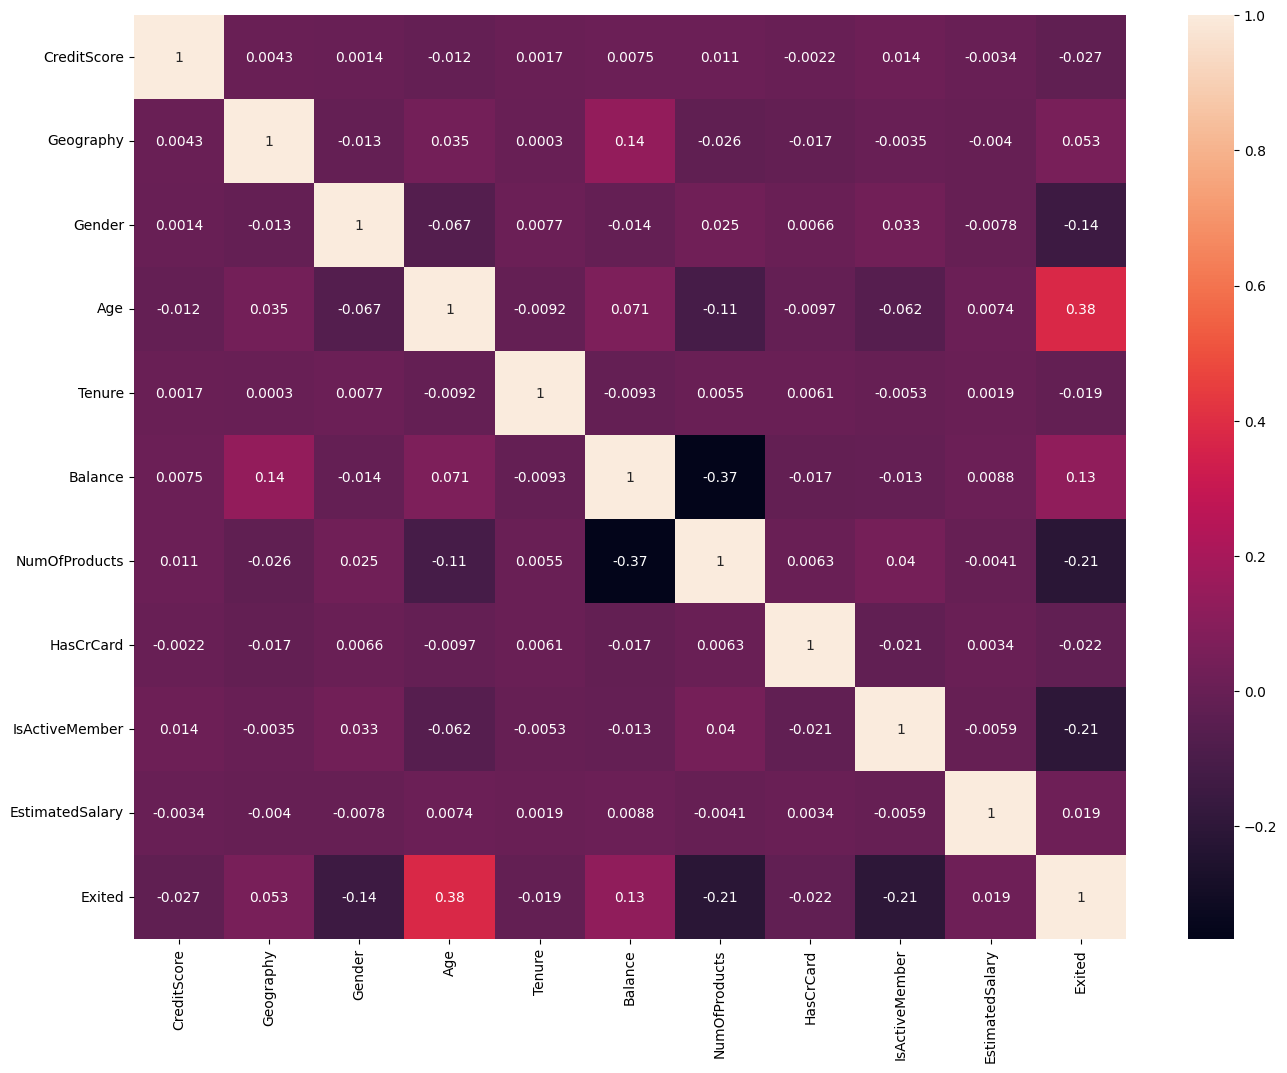

In [ ]:
corr_matrix = data.corr()
sb.heatmap(data = corr_matrix, annot=True)
plt.show()

In [ ]:
# data = data.drop(['AgeCategory'], axis=1)

In [ ]:
abs_corr = abs(corr_matrix['Exited'])
print(abs_corr.loc[abs_corr!=1.0].max())

0.37675466219445314


In [ ]:
# high_correlation = abs_corr[abs_corr>0.1]
# high_correlation = abs_corr[abs_corr>0.3769699521875153/4]
high_correlation = abs_corr[abs_corr>0]
choosen_feature = [col for col in data.columns if col in high_correlation]
print(choosen_feature)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


# MODEL

In [ ]:
x = data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = data['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

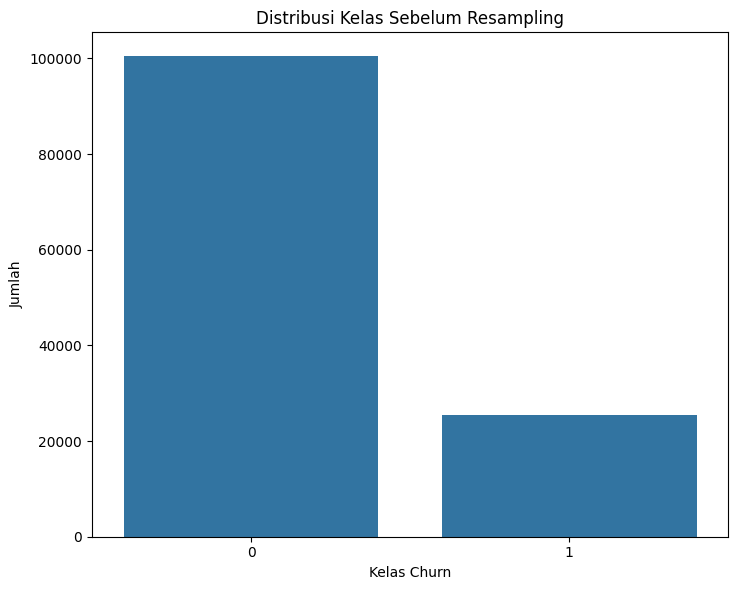

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.countplot(x=y_train)
plt.title('Distribusi Kelas Sebelum Resampling')
plt.xlabel('Kelas Churn')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

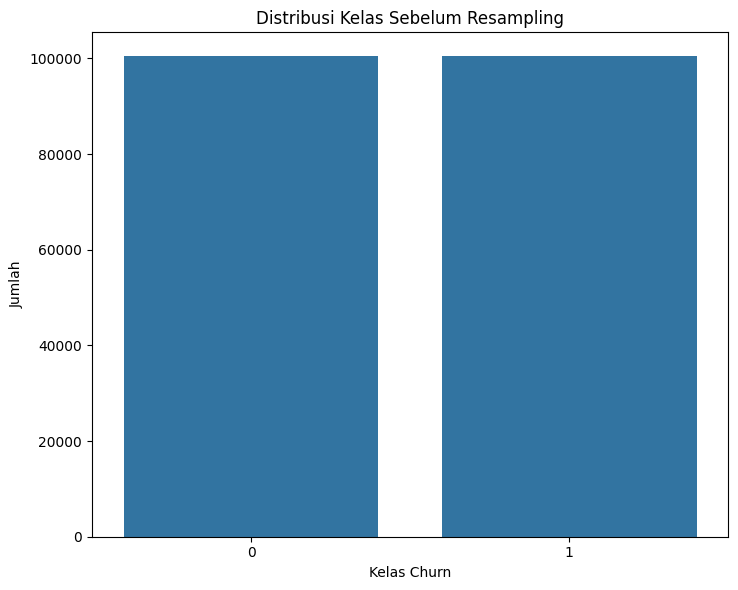

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.countplot(x=y_train)
plt.title('Distribusi Kelas Sebelum Resampling')
plt.xlabel('Kelas Churn')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

In [ ]:
# rus = RandomUnderSampler(random_state=42)
# X_train, y_train = rus.fit_resample(X_train, y_train)

In [ ]:
# # numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# # scaler = MinMaxScaler()

# # data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


scaler = MinMaxScaler()

# Normalisasi data X_train dan X_test
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [ ]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.822275,0.0,1.0,0.631579,0.3,0.000000,0.333333,1.0,0.0,0.939036
1,0.116114,0.5,0.0,0.342105,0.2,0.529449,0.000000,1.0,1.0,0.377791
2,0.898104,1.0,0.0,0.657895,0.3,0.419916,0.333333,0.0,0.0,0.652451
3,0.635071,0.5,1.0,0.500000,0.1,0.518038,0.000000,1.0,1.0,0.518561
4,0.438389,0.0,1.0,0.526316,1.0,0.000000,0.000000,1.0,1.0,0.835201
...,...,...,...,...,...,...,...,...,...,...
200839,0.478673,0.0,0.0,0.631579,0.8,0.000000,0.000000,1.0,0.0,0.704476
200840,0.718009,0.5,0.0,0.763158,0.0,0.458868,0.000000,1.0,0.0,0.727750
200841,0.443128,0.5,0.0,0.394737,0.7,0.494085,0.000000,0.0,0.0,0.517870
200842,0.521327,0.5,0.0,0.710526,0.6,0.558060,0.000000,0.0,0.0,0.260028


In [ ]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
49215,0.604265,1.0,1.0,0.394737,0.6,0.000000,0.333333,1.0,1.0,0.528118
22214,0.353081,0.5,0.0,0.289474,0.4,0.443993,0.000000,1.0,0.0,0.955383
103831,0.428910,1.0,1.0,0.421053,0.6,0.000000,0.333333,1.0,0.0,0.951772
119918,0.398104,0.0,0.0,0.394737,0.2,0.000000,0.333333,1.0,0.0,0.658558
12502,0.362559,0.5,1.0,0.263158,0.3,0.390948,0.000000,1.0,1.0,0.133391
...,...,...,...,...,...,...,...,...,...,...
113428,0.438389,0.5,0.0,0.447368,0.1,0.494436,0.000000,1.0,0.0,0.917525
41617,0.364929,0.5,1.0,0.447368,0.8,0.448253,0.333333,1.0,0.0,0.844094
21266,0.402844,1.0,0.0,0.526316,0.4,0.000000,0.333333,0.0,1.0,0.868942
45074,0.677725,0.0,1.0,0.473684,1.0,0.000000,0.333333,1.0,1.0,0.607681


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((200844, 10), (200844,), (31484, 10), (31484,))

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 45s 6ms/step - accuracy: 0.7657 - loss: 0.4916 - val_accuracy: 0.8102 - val_loss: 0.4131
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8130 - loss: 0.4186 - val_accuracy: 0.7996 - val_loss: 0.4210
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8163 - loss: 0.4112 - val_accuracy: 0.8265 - val_loss: 0.3915
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8155 - loss: 0.4112 - val_accuracy: 0.8156 - val_loss: 0.3868
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8158 - loss: 0.4074 - val_accuracy: 0.8070 - val_loss: 0.4247
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8179 - loss: 0.4068 - val_accuracy: 0.8046 - val_loss: 0.4118
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8170 - loss: 0.4085 - val_accuracy: 0.8213 - val_loss: 0.4010
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8181 - loss: 0

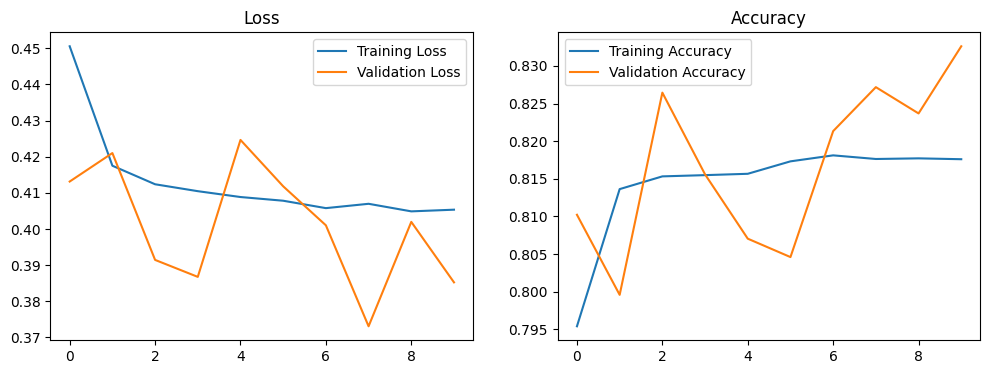

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


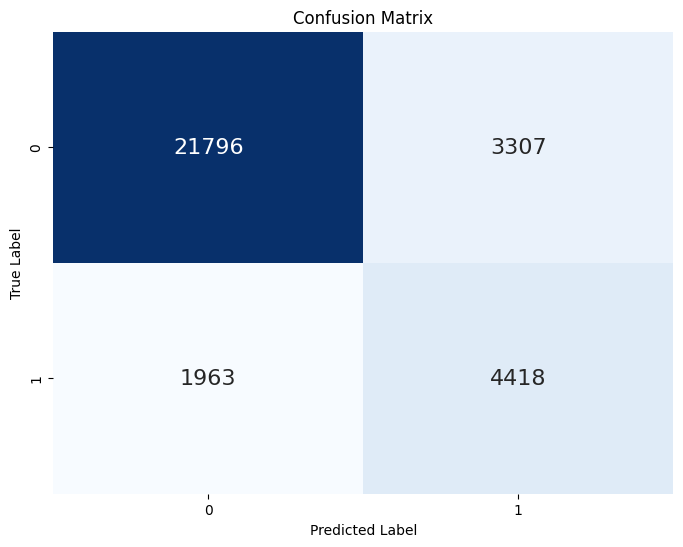

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89     25103
           1       0.57      0.69      0.63      6381

    accuracy                           0.83     31484
   macro avg       0.74      0.78      0.76     31484
weighted avg       0.85      0.83      0.84     31484

ROC-AUC Score: 0.8680


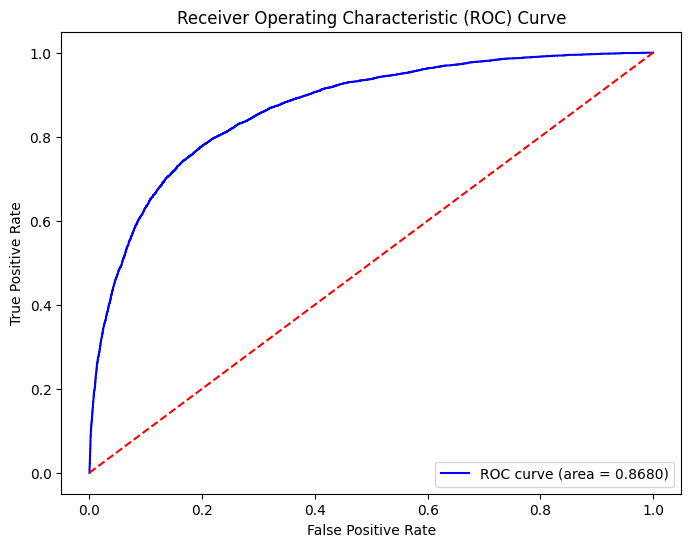

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

opt_glorotN = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_glorotN = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_glorotN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_glorotN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_glorotN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_glorotN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_glorotN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_glorotN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_glorotN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_glorotN.compile(optimizer=opt_glorotN, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_glorotN = model_glorotN.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_glorotN.history['loss'], label='Training Loss')
plt.plot(history_glorotN.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_glorotN.history['accuracy'], label='Training Accuracy')
plt.plot(history_glorotN.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_glorotN.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.7295 - loss: 0.5425 - val_accuracy: 0.8103 - val_loss: 0.4006
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8176 - loss: 0.4343 - val_accuracy: 0.8381 - val_loss: 0.4032
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8244 - loss: 0.4184 - val_accuracy: 0.8176 - val_loss: 0.4269
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8283 - loss: 0.4166 - val_accuracy: 0.8285 - val_loss: 0.4183
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8253 - loss: 0.4145 - val_accuracy: 0.8267 - val_loss: 0.3908
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8266 - loss: 0.4136 - val_accuracy: 0.8251 - val_loss: 0.4041
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8303 - loss: 0.4085 - val_accuracy: 0.8273 - val_loss: 0.4058
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8289 - loss: 0

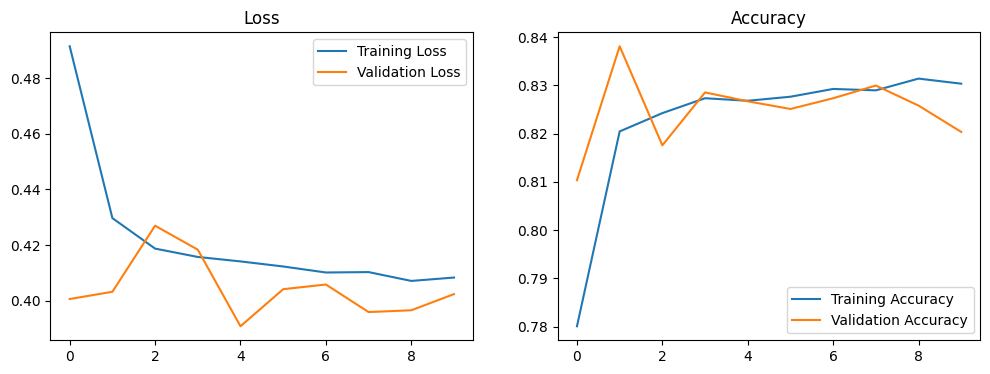

984/984 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


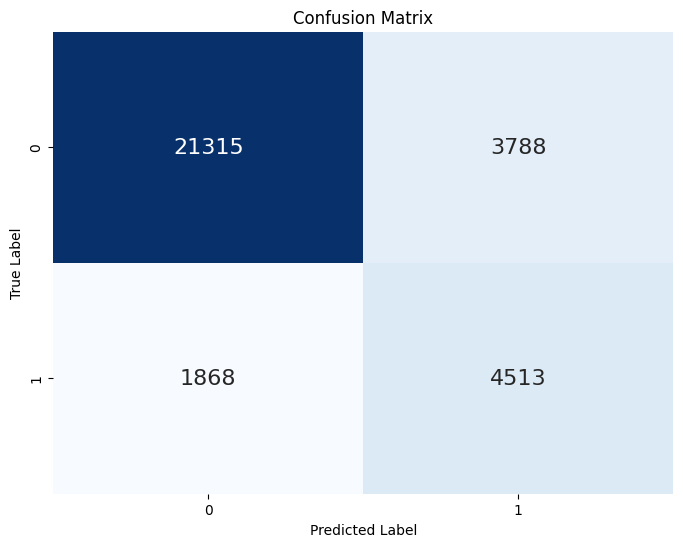

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88     25103
           1       0.54      0.71      0.61      6381

    accuracy                           0.82     31484
   macro avg       0.73      0.78      0.75     31484
weighted avg       0.84      0.82      0.83     31484

ROC-AUC Score: 0.8643


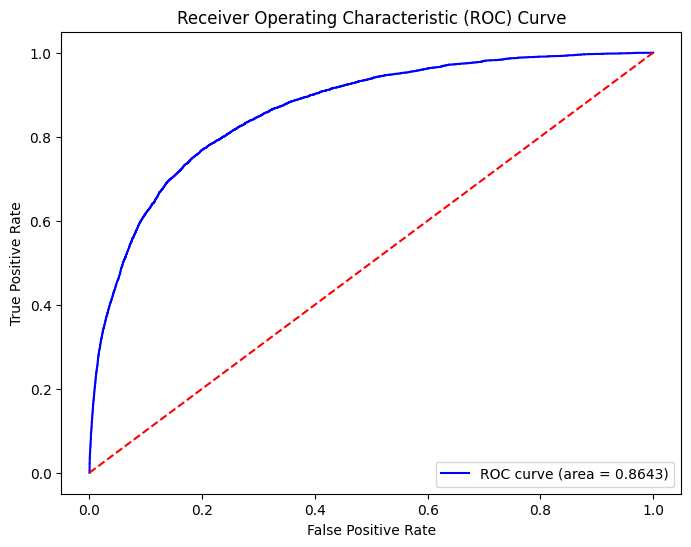

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

opt_heN = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_heN = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_heN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_heN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_heN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_heN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_heN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_heN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_heN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_heN.compile(optimizer=opt_heN, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_heN = model_heN.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_heN.history['loss'], label='Training Loss')
plt.plot(history_heN.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_heN.history['accuracy'], label='Training Accuracy')
plt.plot(history_heN.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_heN.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.7374 - loss: 0.5120 - val_accuracy: 0.8361 - val_loss: 0.3940
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8130 - loss: 0.4327 - val_accuracy: 0.8431 - val_loss: 0.3804
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8139 - loss: 0.4295 - val_accuracy: 0.8412 - val_loss: 0.3864
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8159 - loss: 0.4274 - val_accuracy: 0.8418 - val_loss: 0.3904
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8158 - loss: 0.4269 - val_accuracy: 0.8224 - val_loss: 0.4188
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8169 - loss: 0.4250 - val_accuracy: 0.8345 - val_loss: 0.4242
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8167 - loss: 0.4240 - val_accuracy: 0.8327 - val_loss: 0.3933
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8162 - loss: 0

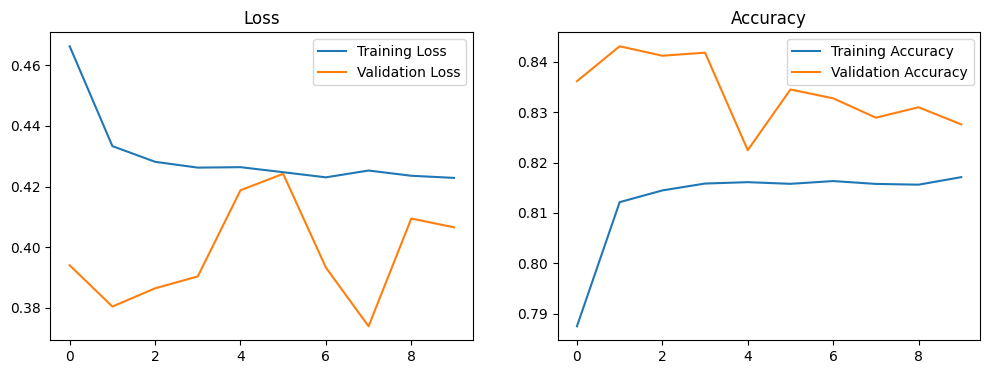

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


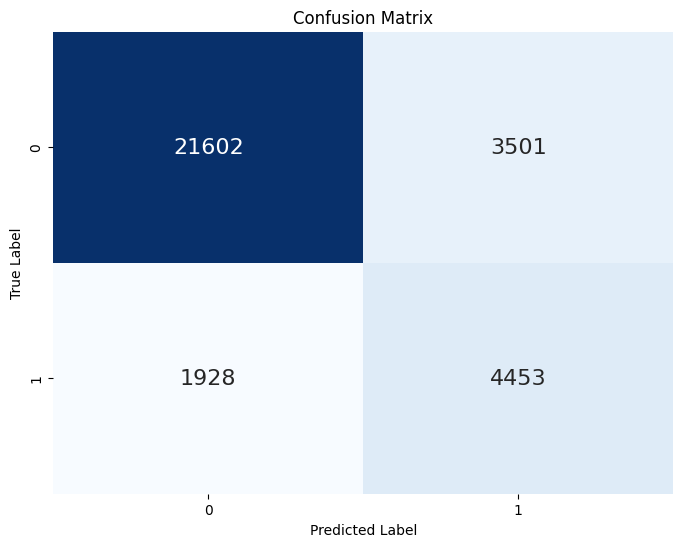

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89     25103
           1       0.56      0.70      0.62      6381

    accuracy                           0.83     31484
   macro avg       0.74      0.78      0.75     31484
weighted avg       0.85      0.83      0.83     31484

ROC-AUC Score: 0.8677


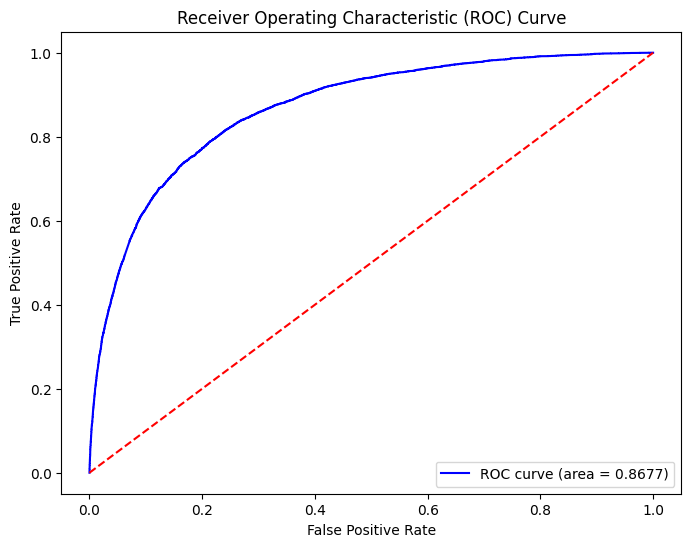

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

opt_randomN = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_randomN = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_randomN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_randomN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_randomN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_randomN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_randomN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_randomN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_randomN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_randomN.compile(optimizer=opt_randomN, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_randomN = model_randomN.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_randomN.history['loss'], label='Training Loss')
plt.plot(history_randomN.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_randomN.history['accuracy'], label='Training Accuracy')
plt.plot(history_randomN.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_randomN.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.7501 - loss: 0.5062 - val_accuracy: 0.8110 - val_loss: 0.4100
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8127 - loss: 0.4225 - val_accuracy: 0.8239 - val_loss: 0.3804
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8141 - loss: 0.4153 - val_accuracy: 0.8217 - val_loss: 0.4015
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8154 - loss: 0.4119 - val_accuracy: 0.8031 - val_loss: 0.4194
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8170 - loss: 0.4085 - val_accuracy: 0.8228 - val_loss: 0.3742
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8162 - loss: 0.4080 - val_accuracy: 0.8227 - val_loss: 0.3985
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8187 - loss: 0.4060 - val_accuracy: 0.8236 - val_loss: 0.3764
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8174 - loss: 0

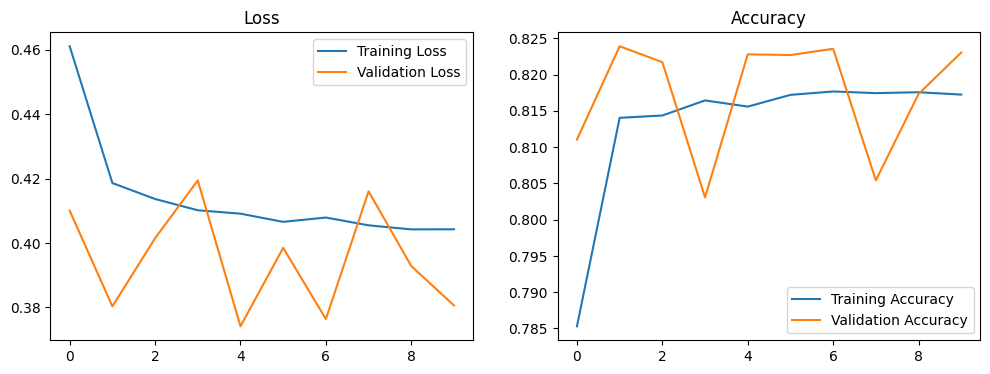

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


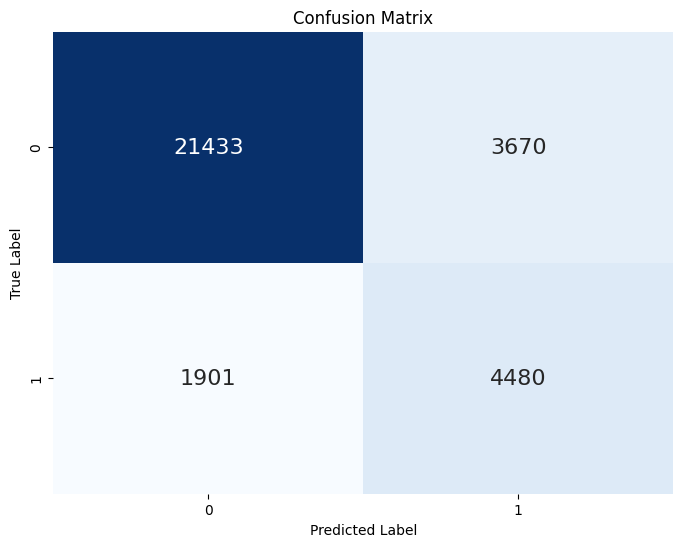

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88     25103
           1       0.55      0.70      0.62      6381

    accuracy                           0.82     31484
   macro avg       0.73      0.78      0.75     31484
weighted avg       0.84      0.82      0.83     31484

ROC-AUC Score: 0.8649


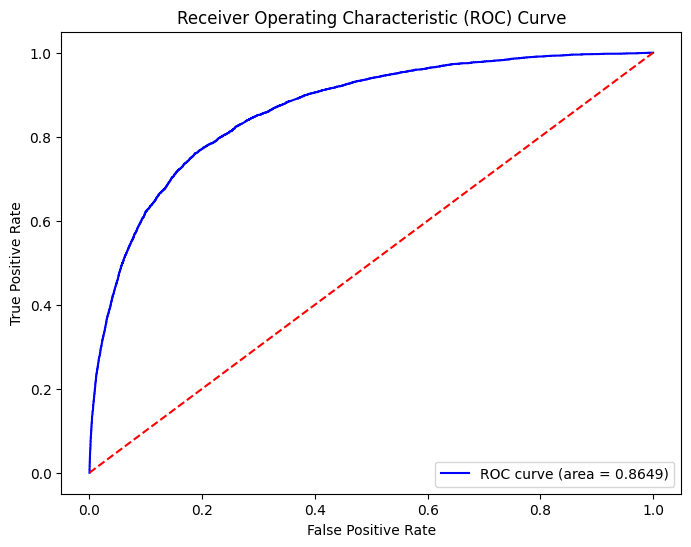

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

opt_lecunN = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_lecunN = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_lecunN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_lecunN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_lecunN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_lecunN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_lecunN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_lecunN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_lecunN),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_lecunN.compile(optimizer=opt_lecunN, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_lecunN = model_lecunN.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lecunN.history['loss'], label='Training Loss')
plt.plot(history_lecunN.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_lecunN.history['accuracy'], label='Training Accuracy')
plt.plot(history_lecunN.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_lecunN.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 0.7358 - loss: 0.5653 - val_accuracy: 0.8250 - val_loss: 0.4014
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8230 - loss: 0.4165 - val_accuracy: 0.8355 - val_loss: 0.3914
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8295 - loss: 0.4044 - val_accuracy: 0.8364 - val_loss: 0.3983
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8294 - loss: 0.4039 - val_accuracy: 0.8171 - val_loss: 0.4228
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8325 - loss: 0.4005 - val_accuracy: 0.8293 - val_loss: 0.4021
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8331 - loss: 0.3980 - val_accuracy: 0.8223 - val_loss: 0.4161
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8347 - loss: 0.3965 - val_accuracy: 0.8221 - val_loss: 0.4065
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8349 - loss: 0

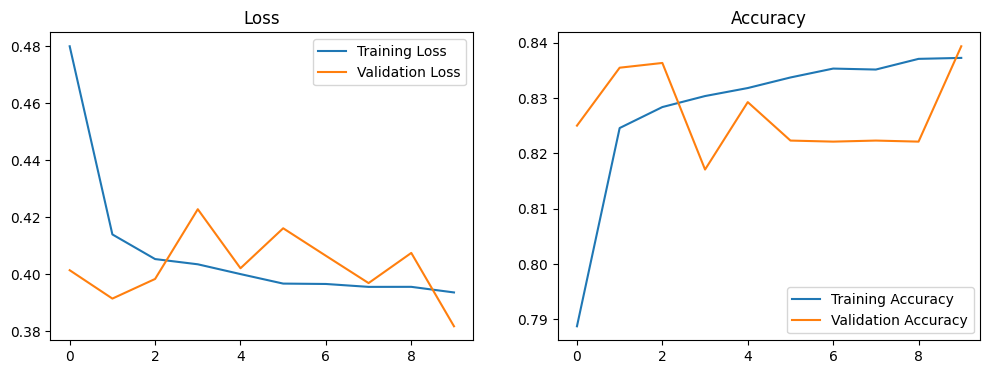

984/984 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


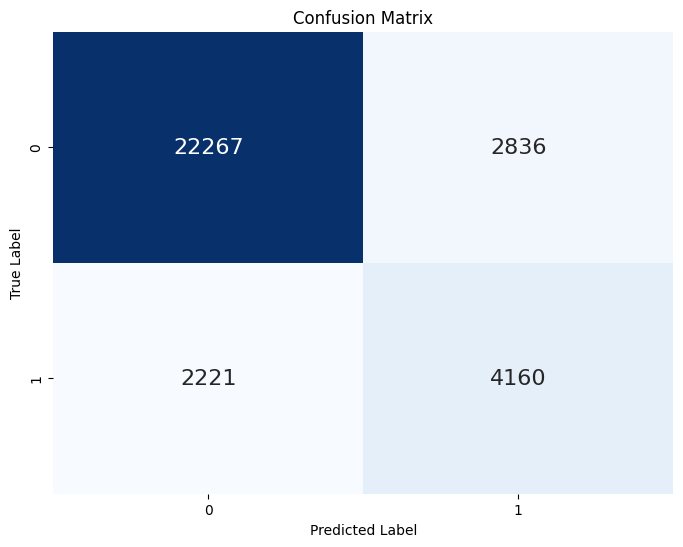

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     25103
           1       0.59      0.65      0.62      6381

    accuracy                           0.84     31484
   macro avg       0.75      0.77      0.76     31484
weighted avg       0.85      0.84      0.84     31484

ROC-AUC Score: 0.8666


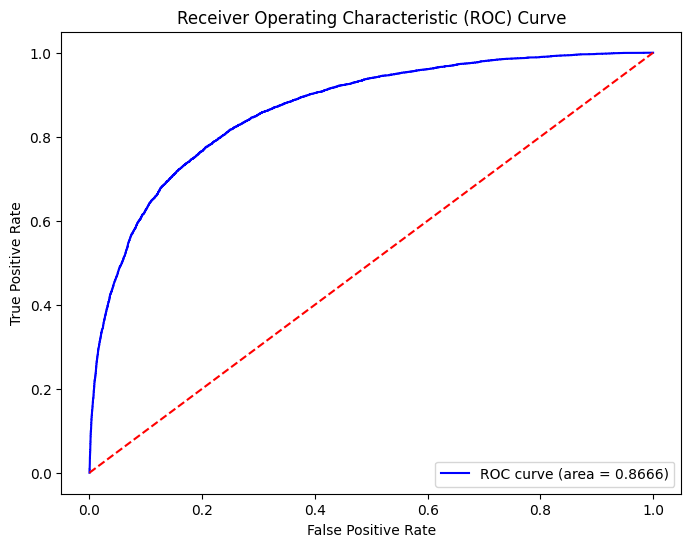

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros

# Define different initializers
initializer_glorotN_B = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

opt_glorotN_B = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_glorotN_B = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_glorotN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_glorotN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_glorotN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_glorotN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_glorotN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_glorotN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_glorotN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_glorotN_B.compile(optimizer=opt_glorotN_B, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_glorotN_B = model_glorotN_B.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_glorotN_B.history['loss'], label='Training Loss')
plt.plot(history_glorotN_B.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_glorotN_B.history['accuracy'], label='Training Accuracy')
plt.plot(history_glorotN_B.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_glorotN_B.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


HE NORMAL :

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.7261 - loss: 0.5498 - val_accuracy: 0.8133 - val_loss: 0.4155
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8199 - loss: 0.4215 - val_accuracy: 0.8224 - val_loss: 0.4060
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8302 - loss: 0.4089 - val_accuracy: 0.8299 - val_loss: 0.3976
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8308 - loss: 0.4048 - val_accuracy: 0.8284 - val_loss: 0.4029
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.8350 - loss: 0.4000 - val_accuracy: 0.8284 - val_loss: 0.3929
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.8347 - loss: 0.3991 - val_accuracy: 0.8294 - val_loss: 0.3900
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.8356 - loss: 0.4003 - val_accuracy: 0.8293 - val_loss: 0.3967
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8387 - loss: 0

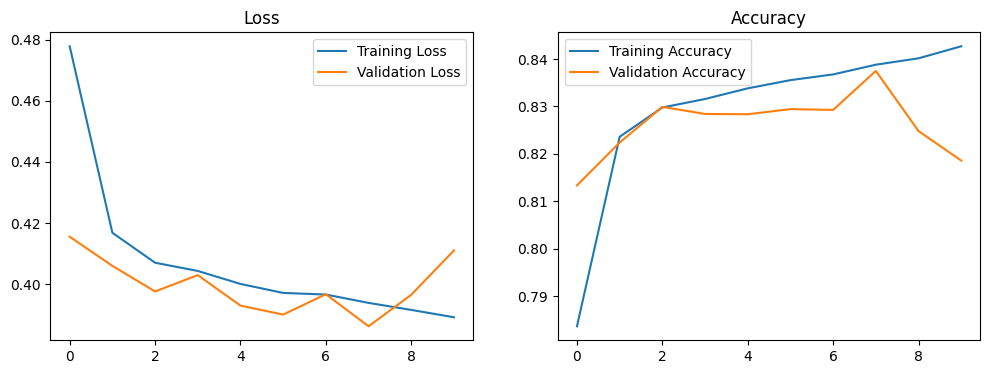

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


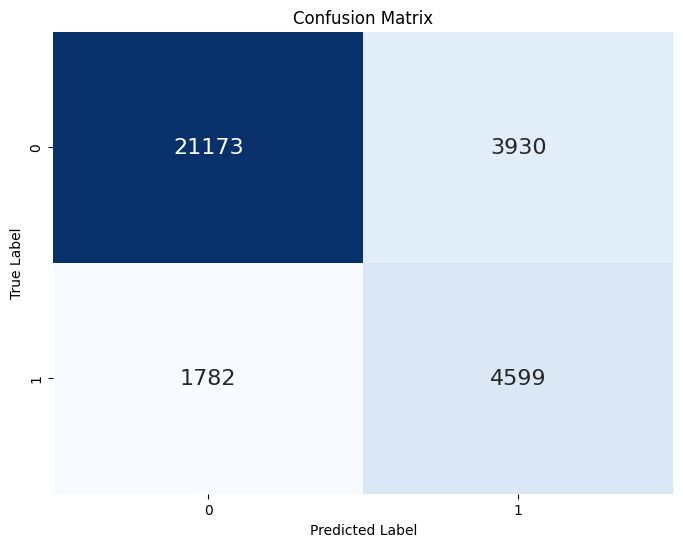

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88     25103
           1       0.54      0.72      0.62      6381

    accuracy                           0.82     31484
   macro avg       0.73      0.78      0.75     31484
weighted avg       0.84      0.82      0.83     31484

ROC-AUC Score: 0.8669


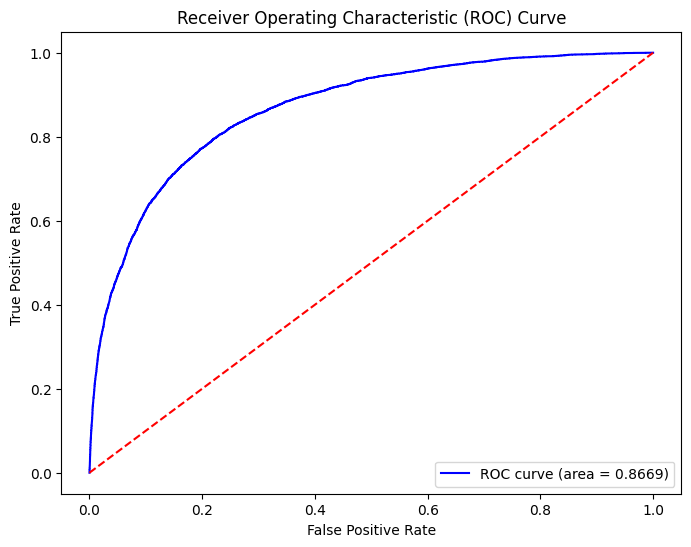

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN_B = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

opt_heN_B = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_heN_B = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_heN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_heN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_heN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_heN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_heN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_heN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_heN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_heN_B.compile(optimizer=opt_heN_B, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_heN_B = model_heN_B.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_heN_B.history['loss'], label='Training Loss')
plt.plot(history_heN_B.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_heN_B.history['accuracy'], label='Training Accuracy')
plt.plot(history_heN_B.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_heN_B.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.7790 - loss: 0.4873 - val_accuracy: 0.7884 - val_loss: 0.4410
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.8291 - loss: 0.4104 - val_accuracy: 0.8258 - val_loss: 0.4067
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.8312 - loss: 0.4032 - val_accuracy: 0.8288 - val_loss: 0.3971
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8321 - loss: 0.4031 - val_accuracy: 0.8355 - val_loss: 0.3815
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.8350 - loss: 0.3991 - val_accuracy: 0.8173 - val_loss: 0.4049
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8365 - loss: 0.3986 - val_accuracy: 0.8149 - val_loss: 0.4174
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8339 - loss: 0.3984 - val_accuracy: 0.8175 - val_loss: 0.4071
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.8375 - loss: 0

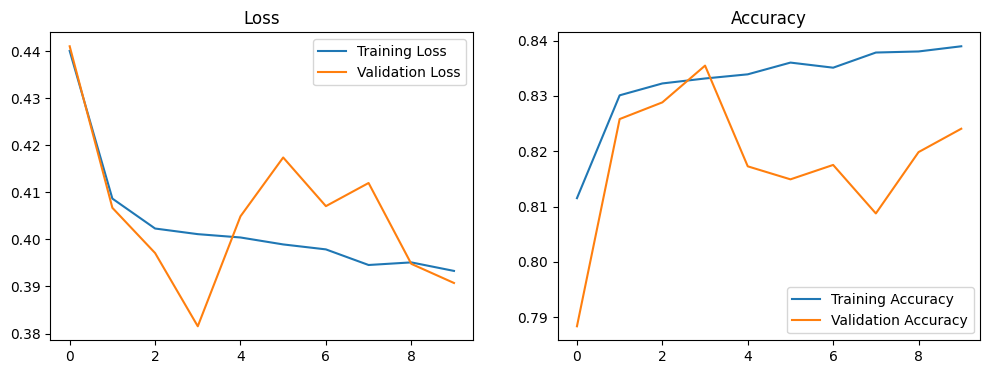

984/984 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


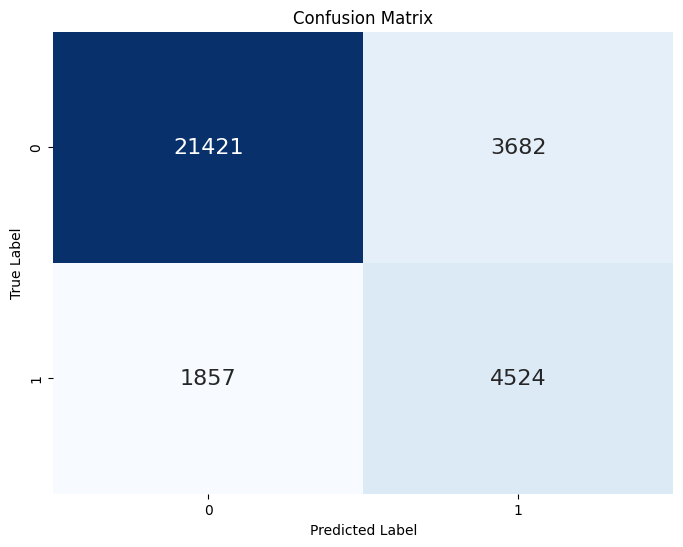

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.89     25103
           1       0.55      0.71      0.62      6381

    accuracy                           0.82     31484
   macro avg       0.74      0.78      0.75     31484
weighted avg       0.85      0.82      0.83     31484

ROC-AUC Score: 0.8659


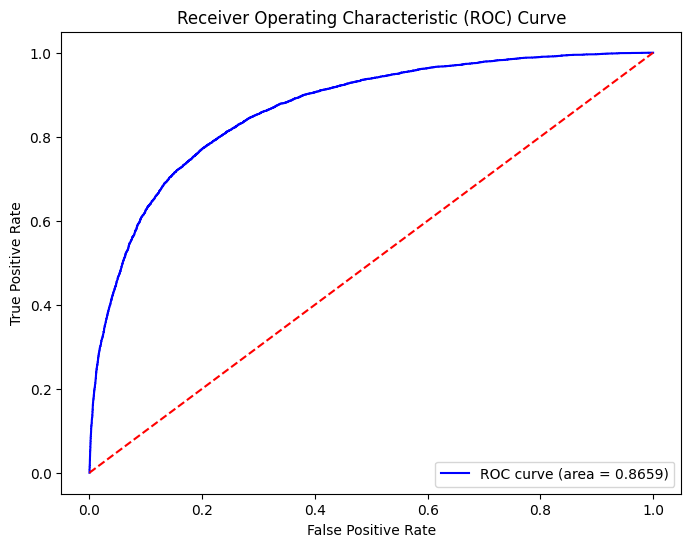

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN_B = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

opt_randomN_B = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_randomN_B = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_randomN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_randomN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_randomN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_randomN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_randomN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_randomN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_randomN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_randomN_B.compile(optimizer=opt_randomN_B, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_randomN_B = model_randomN_B.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_randomN_B.history['loss'], label='Training Loss')
plt.plot(history_randomN_B.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_randomN_B.history['accuracy'], label='Training Accuracy')
plt.plot(history_randomN_B.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_randomN_B.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 49s 6ms/step - accuracy: 0.7370 - loss: 0.5462 - val_accuracy: 0.8188 - val_loss: 0.4021
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - accuracy: 0.8231 - loss: 0.4153 - val_accuracy: 0.8334 - val_loss: 0.3930
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8294 - loss: 0.4051 - val_accuracy: 0.8170 - val_loss: 0.4178
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8324 - loss: 0.4000 - val_accuracy: 0.8386 - val_loss: 0.3923
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8330 - loss: 0.4015 - val_accuracy: 0.8042 - val_loss: 0.4160
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.8343 - loss: 0.3984 - val_accuracy: 0.8026 - val_loss: 0.4103
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.8337 - loss: 0.3961 - val_accuracy: 0.8230 - val_loss: 0.3996
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8366 - loss: 0

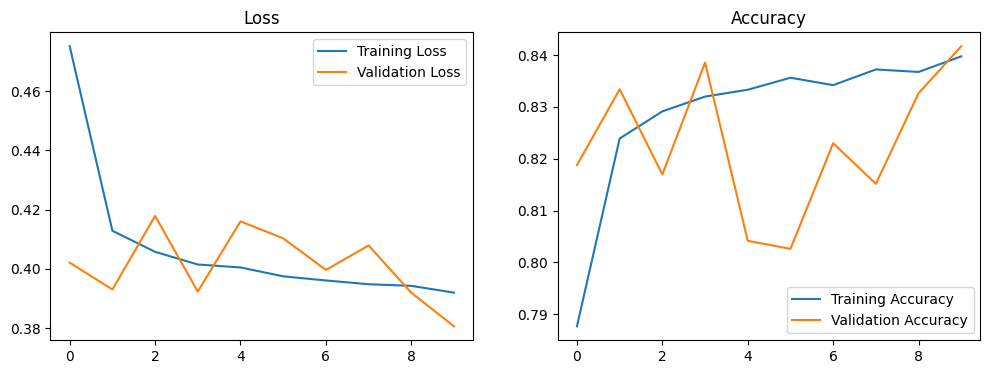

984/984 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


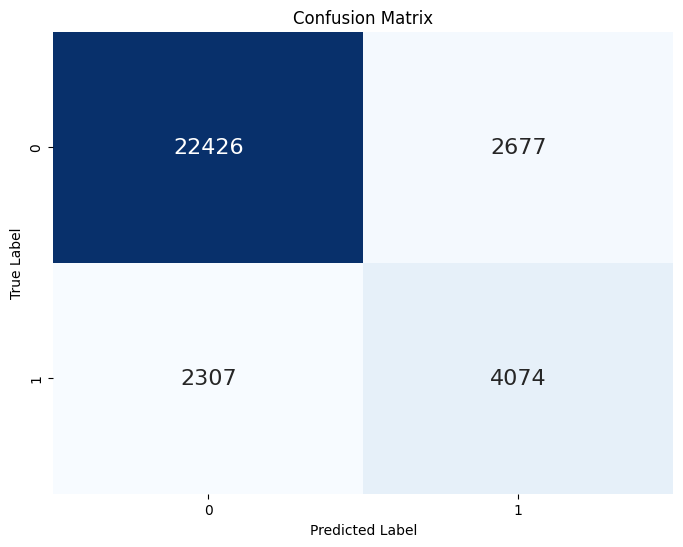

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     25103
           1       0.60      0.64      0.62      6381

    accuracy                           0.84     31484
   macro avg       0.76      0.77      0.76     31484
weighted avg       0.85      0.84      0.84     31484

ROC-AUC Score: 0.8654


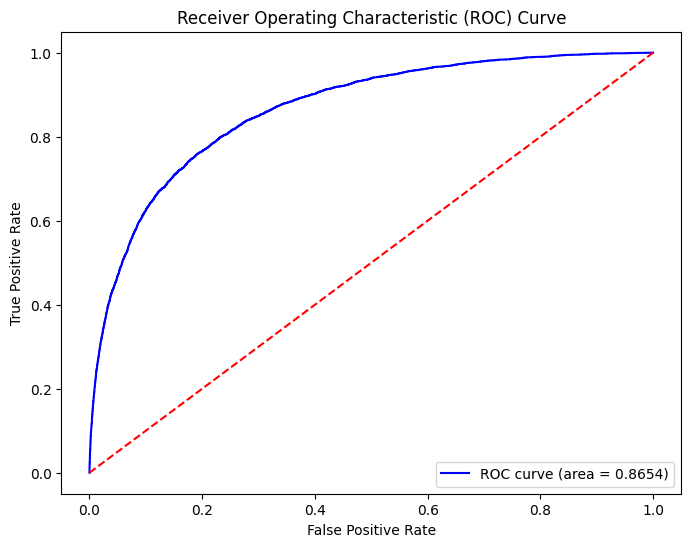

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN_B = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

opt_lecunN_B = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_lecunN_B = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_lecunN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_lecunN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_lecunN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_lecunN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_lecunN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_lecunN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_lecunN_B),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_lecunN_B.compile(optimizer=opt_lecunN_B, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_lecunN_B = model_lecunN_B.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lecunN_B.history['loss'], label='Training Loss')
plt.plot(history_lecunN_B.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_lecunN_B.history['accuracy'], label='Training Accuracy')
plt.plot(history_lecunN_B.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_lecunN_B.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.8170 - loss: 0.4089 - val_accuracy: 0.8106 - val_loss: 0.4339
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8459 - loss: 0.3583 - val_accuracy: 0.8253 - val_loss: 0.3995
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8495 - loss: 0.3528 - val_accuracy: 0.8153 - val_loss: 0.4231
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8516 - loss: 0.3476 - val_accuracy: 0.8351 - val_loss: 0.3944
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.8513 - loss: 0.3492 - val_accuracy: 0.8214 - val_loss: 0.4118
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.8534 - loss: 0.3466 - val_accuracy: 0.8313 - val_loss: 0.4067
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.8535 - loss: 0.3447 - val_accuracy: 0.8296 - val_loss: 0.3942
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8536 - loss: 0

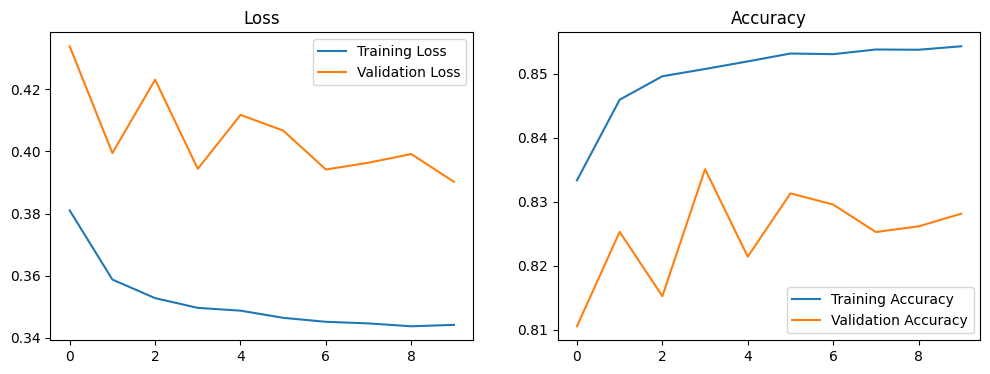

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


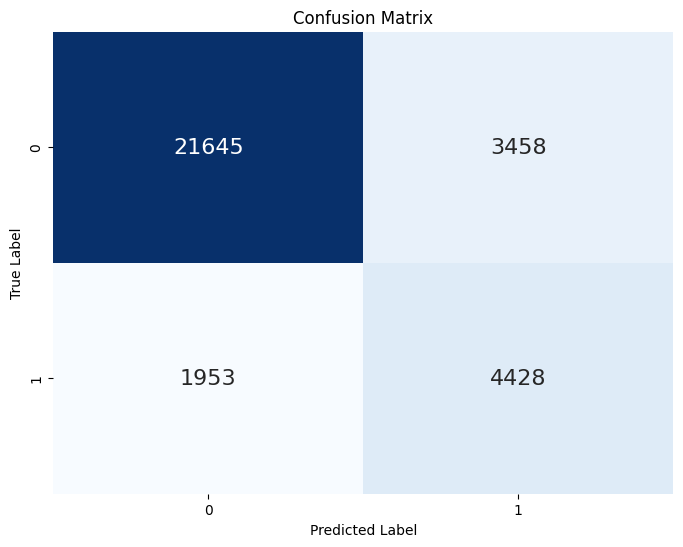

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89     25103
           1       0.56      0.69      0.62      6381

    accuracy                           0.83     31484
   macro avg       0.74      0.78      0.75     31484
weighted avg       0.85      0.83      0.83     31484

ROC-AUC Score: 0.8699


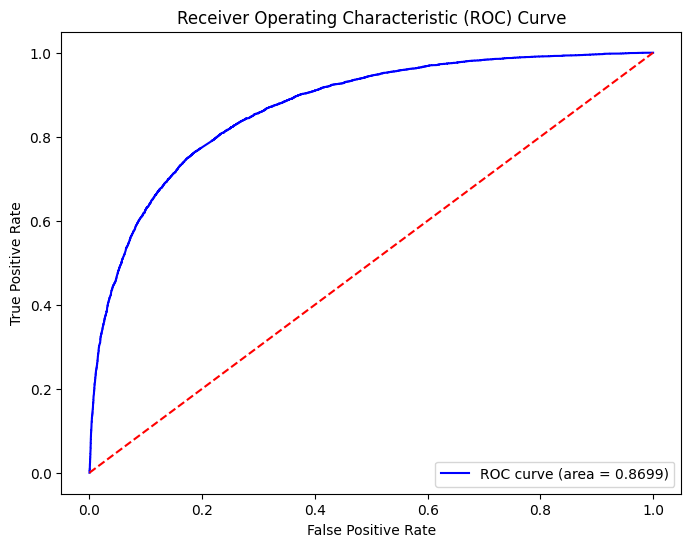

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros

# Define different initializers
initializer_glorotN_B_D = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

opt_glorotN_B_D = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_glorotN_B_D = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_glorotN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_glorotN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_glorotN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_glorotN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_glorotN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_glorotN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_glorotN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_glorotN_B_D.compile(optimizer=opt_glorotN_B_D, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_glorotN_B_D = model_glorotN_B_D.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_glorotN_B_D.history['loss'], label='Training Loss')
plt.plot(history_glorotN_B_D.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_glorotN_B_D.history['accuracy'], label='Training Accuracy')
plt.plot(history_glorotN_B_D.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_glorotN_B_D.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 0.8173 - loss: 0.4182 - val_accuracy: 0.8041 - val_loss: 0.4193
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.8456 - loss: 0.3597 - val_accuracy: 0.8289 - val_loss: 0.3977
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.8487 - loss: 0.3549 - val_accuracy: 0.8199 - val_loss: 0.3947
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8520 - loss: 0.3473 - val_accuracy: 0.8234 - val_loss: 0.4027
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8532 - loss: 0.3466 - val_accuracy: 0.8178 - val_loss: 0.4061
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8536 - loss: 0.3463 - val_accuracy: 0.8284 - val_loss: 0.3933
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8549 - loss: 0.3439 - val_accuracy: 0.8246 - val_loss: 0.3916
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8559 - loss: 0

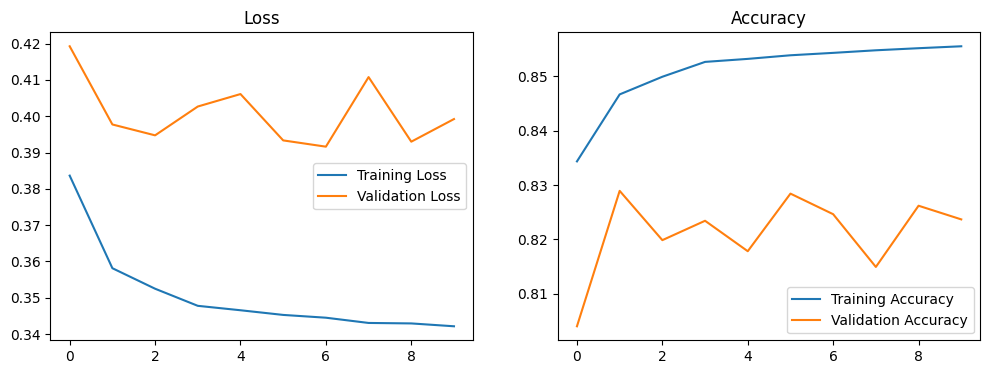

984/984 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


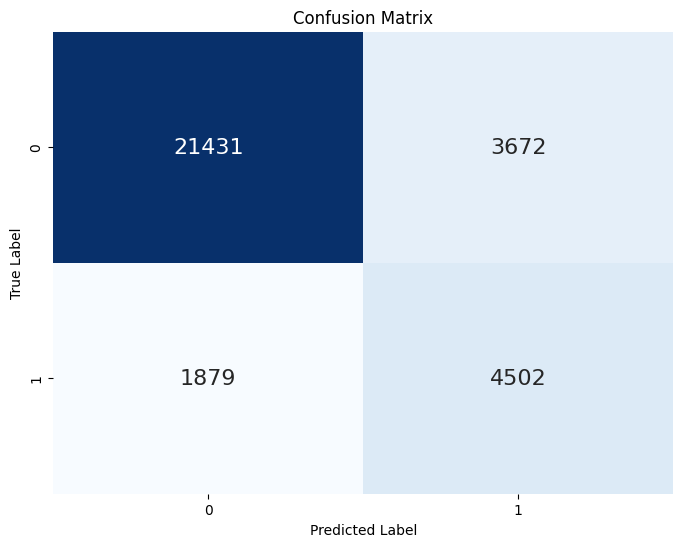

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.89     25103
           1       0.55      0.71      0.62      6381

    accuracy                           0.82     31484
   macro avg       0.74      0.78      0.75     31484
weighted avg       0.84      0.82      0.83     31484

ROC-AUC Score: 0.8654


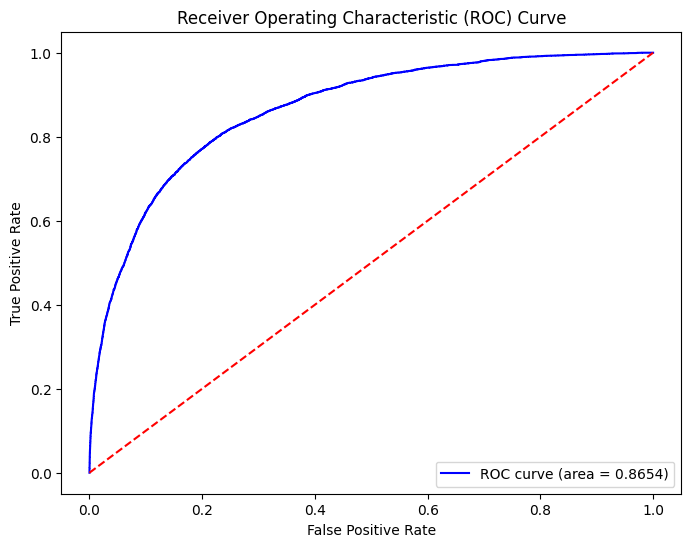

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN_B_D = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

opt_heN_B_D = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_heN_B_D = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_heN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_heN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_heN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_heN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_heN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_heN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_heN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_heN_B_D.compile(optimizer=opt_heN_B_D, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_heN_B_D = model_heN_B_D.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_heN_B_D.history['loss'], label='Training Loss')
plt.plot(history_heN_B_D.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_heN_B_D.history['accuracy'], label='Training Accuracy')
plt.plot(history_heN_B_D.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_heN_B_D.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.8263 - loss: 0.3940 - val_accuracy: 0.8272 - val_loss: 0.3922
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.8444 - loss: 0.3597 - val_accuracy: 0.8383 - val_loss: 0.3939
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.8475 - loss: 0.3552 - val_accuracy: 0.8098 - val_loss: 0.4185
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8494 - loss: 0.3525 - val_accuracy: 0.8207 - val_loss: 0.3960
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8517 - loss: 0.3483 - val_accuracy: 0.8197 - val_loss: 0.4306
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8537 - loss: 0.3466 - val_accuracy: 0.8358 - val_loss: 0.3896
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8539 - loss: 0.3448 - val_accuracy: 0.8412 - val_loss: 0.3823
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8547 - loss: 0

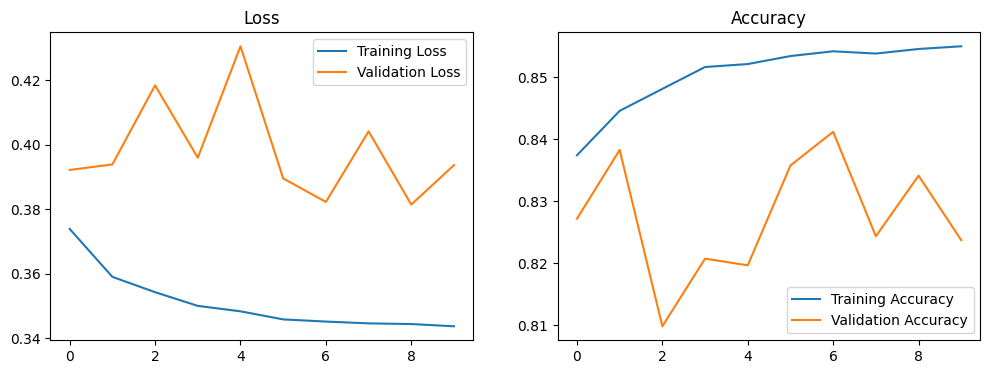

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


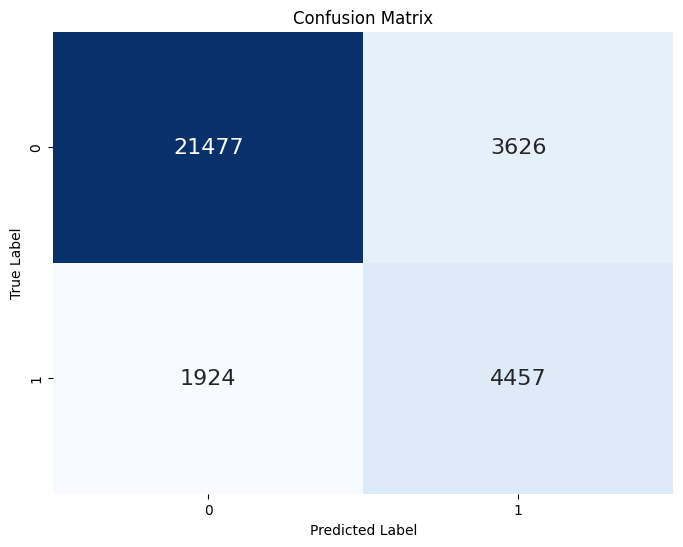

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89     25103
           1       0.55      0.70      0.62      6381

    accuracy                           0.82     31484
   macro avg       0.73      0.78      0.75     31484
weighted avg       0.84      0.82      0.83     31484

ROC-AUC Score: 0.8682


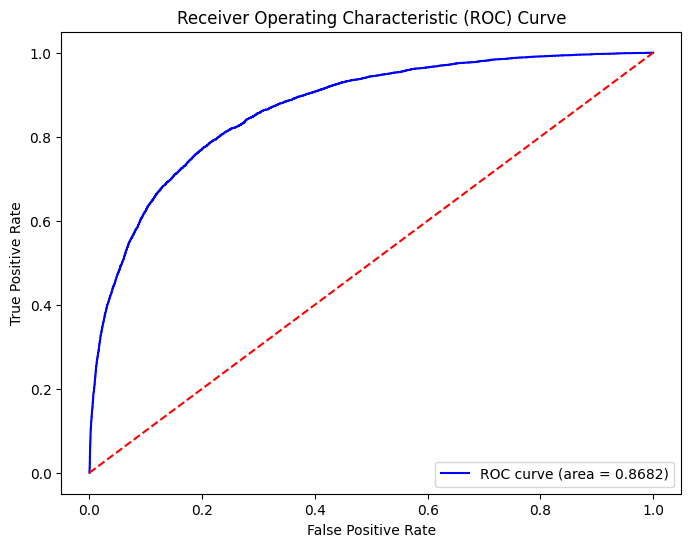

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN_B_D = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

opt_randomN_B_D = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_randomN_B_D = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_randomN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_randomN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_randomN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_randomN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_randomN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_randomN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_randomN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_randomN_B_D.compile(optimizer=opt_randomN_B_D, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_randomN_B_D = model_randomN_B_D.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_randomN_B_D.history['loss'], label='Training Loss')
plt.plot(history_randomN_B_D.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_randomN_B_D.history['accuracy'], label='Training Accuracy')
plt.plot(history_randomN_B_D.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_randomN_B_D.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.8188 - loss: 0.4088 - val_accuracy: 0.8270 - val_loss: 0.4008
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.8454 - loss: 0.3606 - val_accuracy: 0.8109 - val_loss: 0.4224
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8523 - loss: 0.3510 - val_accuracy: 0.8262 - val_loss: 0.4080
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8532 - loss: 0.3496 - val_accuracy: 0.8207 - val_loss: 0.4069
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8537 - loss: 0.3464 - val_accuracy: 0.8183 - val_loss: 0.4092
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8541 - loss: 0.3460 - val_accuracy: 0.8265 - val_loss: 0.3944
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8555 - loss: 0.3430 - val_accuracy: 0.8217 - val_loss: 0.4096
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.8545 - loss: 0

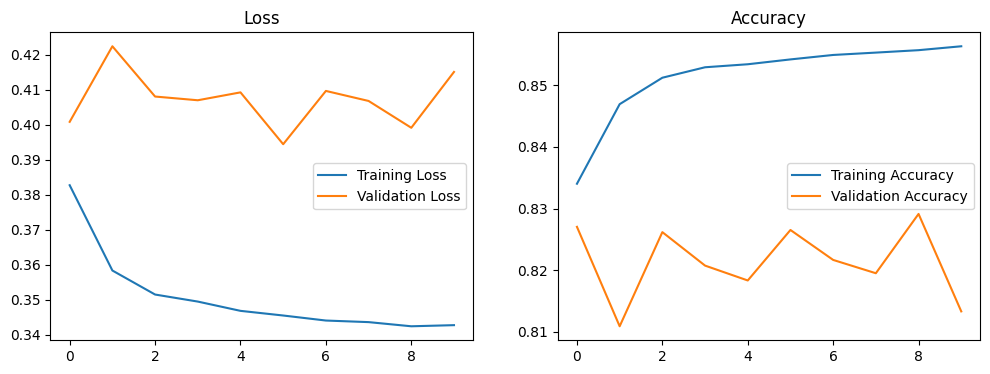

984/984 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


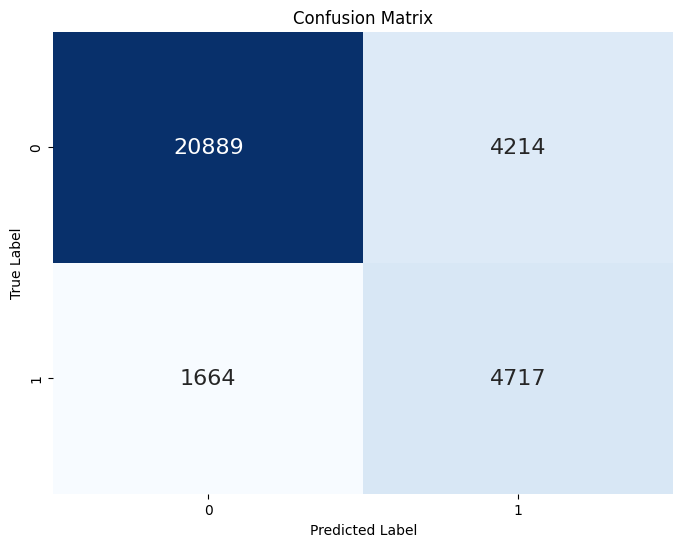

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88     25103
           1       0.53      0.74      0.62      6381

    accuracy                           0.81     31484
   macro avg       0.73      0.79      0.75     31484
weighted avg       0.85      0.81      0.82     31484

ROC-AUC Score: 0.8679


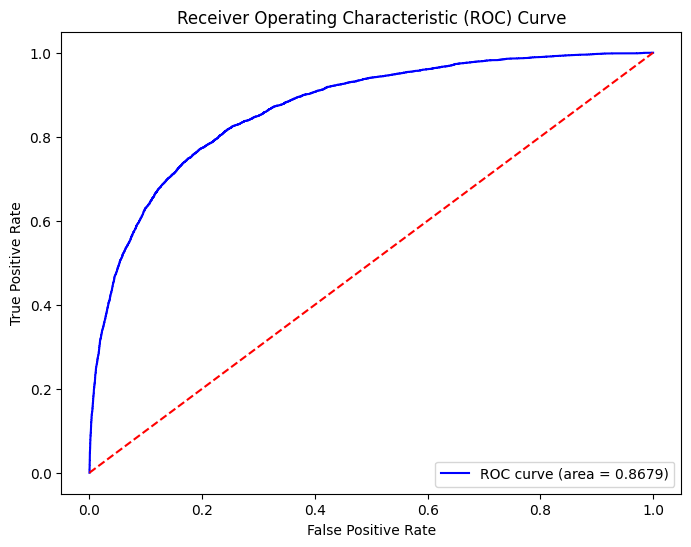

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN_B_D = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

opt_lecunN_B_D = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_lecunN_B_D = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_lecunN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_lecunN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_lecunN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_lecunN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_lecunN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_lecunN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_lecunN_B_D),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_lecunN_B_D.compile(optimizer=opt_lecunN_B_D, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_lecunN_B_D = model_lecunN_B_D.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lecunN_B_D.history['loss'], label='Training Loss')
plt.plot(history_lecunN_B_D.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_lecunN_B_D.history['accuracy'], label='Training Accuracy')
plt.plot(history_lecunN_B_D.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_lecunN_B_D.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8298 - loss: 0.4414 - val_accuracy: 0.8317 - val_loss: 0.4017
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.8553 - loss: 0.3441 - val_accuracy: 0.8259 - val_loss: 0.3997
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8559 - loss: 0.3385 - val_accuracy: 0.8211 - val_loss: 0.4105
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8552 - loss: 0.3373 - val_accuracy: 0.8187 - val_loss: 0.4106
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8564 - loss: 0.3369 - val_accuracy: 0.8093 - val_loss: 0.4243
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8561 - loss: 0.3358 - val_accuracy: 0.8119 - val_loss: 0.4162
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8580 - loss: 0.3344 - val_accuracy: 0.8220 - val_loss: 0.4061
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8561 - loss: 0

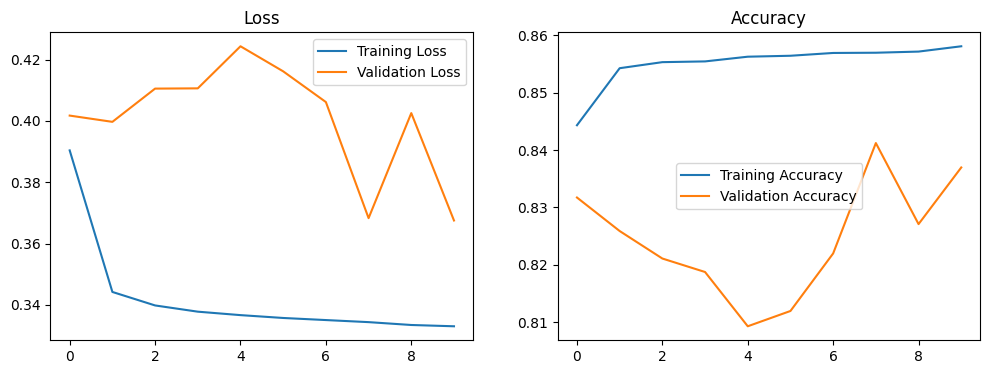

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


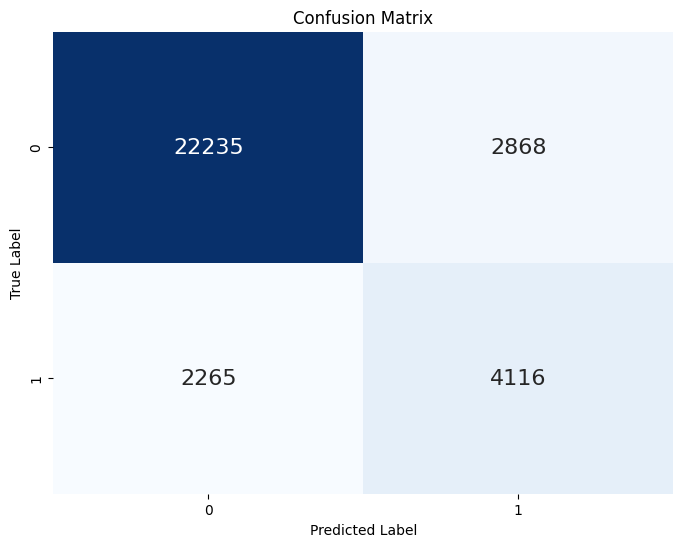

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     25103
           1       0.59      0.65      0.62      6381

    accuracy                           0.84     31484
   macro avg       0.75      0.77      0.76     31484
weighted avg       0.84      0.84      0.84     31484

ROC-AUC Score: 0.8658


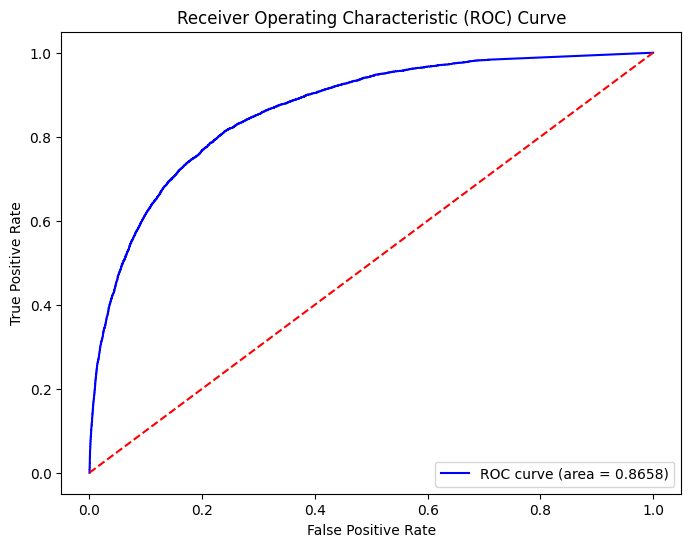

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros

# Define different initializers
initializer_glorotNoNo = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

opt_glorotNoNo = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_glorotNoNo = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_glorotNoNo),
    # layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_glorotNoNo),
    # layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_glorotNoNo),
    # layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_glorotNoNo),
    # layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_glorotNoNo),
    # layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_glorotNoNo),
    # layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_glorotNoNo),
    # layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_glorotNoNo.compile(optimizer=opt_glorotNoNo, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_glorotNoNo = model_glorotNoNo.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_glorotNoNo.history['loss'], label='Training Loss')
plt.plot(history_glorotNoNo.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_glorotNoNo.history['accuracy'], label='Training Accuracy')
plt.plot(history_glorotNoNo.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_glorotNoNo.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.8156 - loss: 0.4150 - val_accuracy: 0.8324 - val_loss: 0.3950
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8460 - loss: 0.3591 - val_accuracy: 0.8056 - val_loss: 0.4331
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8472 - loss: 0.3565 - val_accuracy: 0.8244 - val_loss: 0.4017
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8510 - loss: 0.3496 - val_accuracy: 0.8264 - val_loss: 0.3938
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8530 - loss: 0.3458 - val_accuracy: 0.8220 - val_loss: 0.4124
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8541 - loss: 0.3436 - val_accuracy: 0.8317 - val_loss: 0.3886
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8536 - loss: 0.3445 - val_accuracy: 0.8209 - val_loss: 0.4062
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8564 - loss: 0

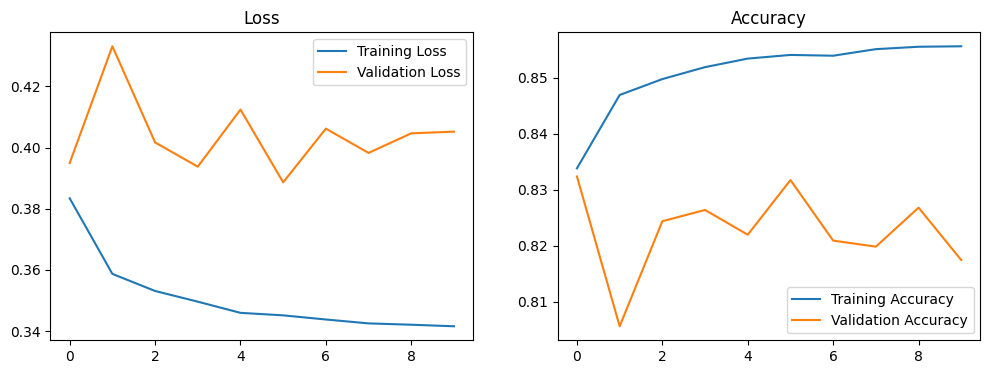

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


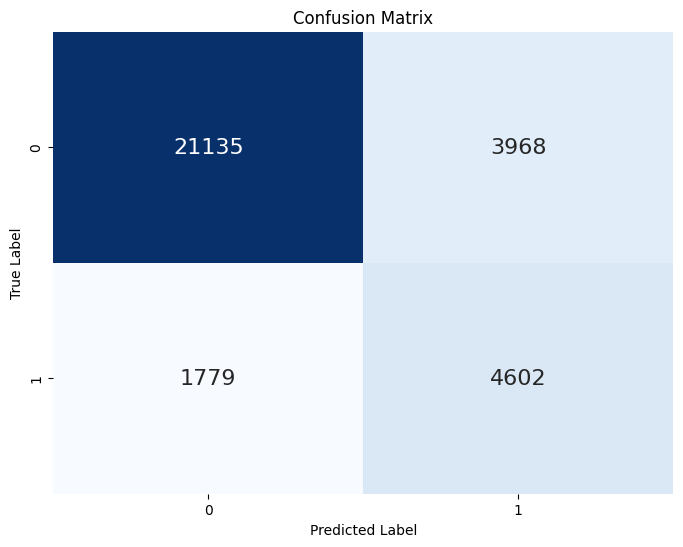

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88     25103
           1       0.54      0.72      0.62      6381

    accuracy                           0.82     31484
   macro avg       0.73      0.78      0.75     31484
weighted avg       0.84      0.82      0.83     31484

ROC-AUC Score: 0.8656


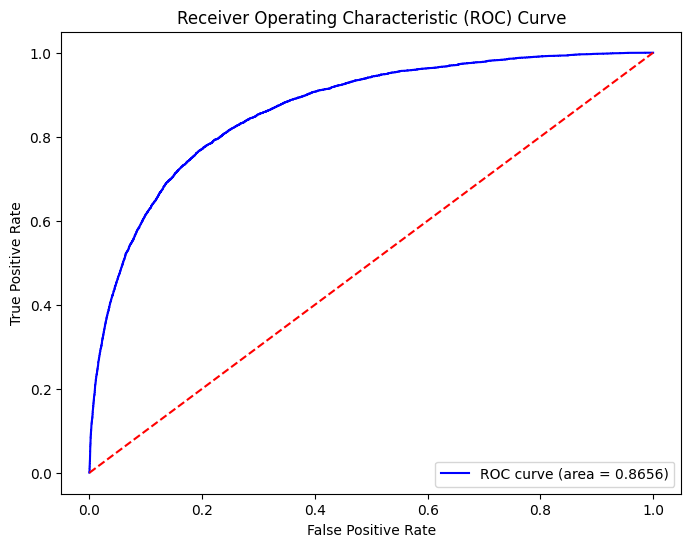

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heNoNo = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

opt_heNoNo = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_heNoNo = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_heNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_heNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_heNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_heNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_heNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_heNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_heNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_heNoNo.compile(optimizer=opt_heNoNo, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_heNoNo = model_heNoNo.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_heNoNo.history['loss'], label='Training Loss')
plt.plot(history_heNoNo.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_heNoNo.history['accuracy'], label='Training Accuracy')
plt.plot(history_heNoNo.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_heNoNo.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.8234 - loss: 0.3986 - val_accuracy: 0.8356 - val_loss: 0.3902
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.8446 - loss: 0.3615 - val_accuracy: 0.8270 - val_loss: 0.4096
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.8480 - loss: 0.3549 - val_accuracy: 0.8086 - val_loss: 0.4357
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.8490 - loss: 0.3517 - val_accuracy: 0.8276 - val_loss: 0.4108
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.8525 - loss: 0.3464 - val_accuracy: 0.8275 - val_loss: 0.3969
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.8539 - loss: 0.3455 - val_accuracy: 0.8260 - val_loss: 0.4037
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8552 - loss: 0.3439 - val_accuracy: 0.8346 - val_loss: 0.3916
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8549 - loss: 0

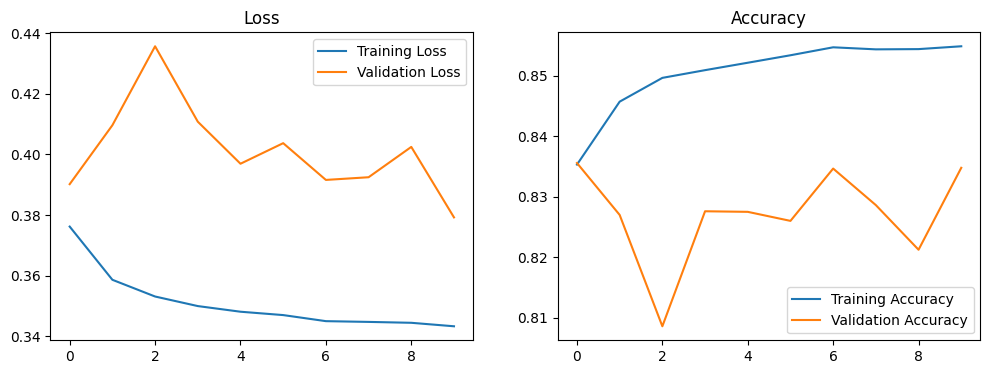

984/984 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


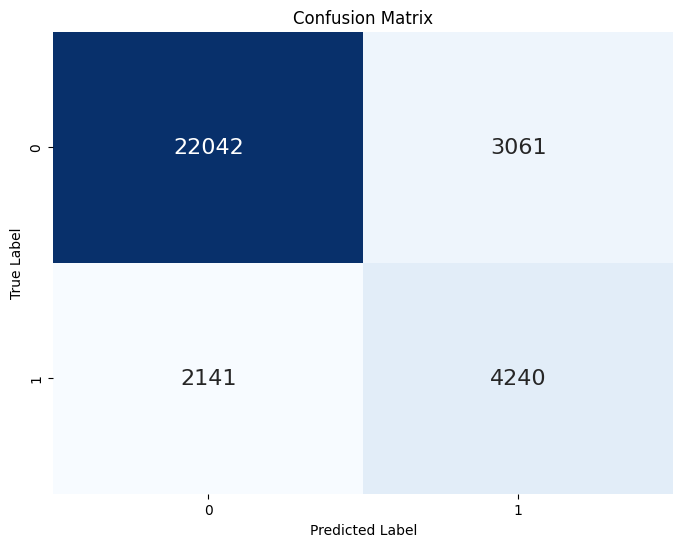

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89     25103
           1       0.58      0.66      0.62      6381

    accuracy                           0.83     31484
   macro avg       0.75      0.77      0.76     31484
weighted avg       0.84      0.83      0.84     31484

ROC-AUC Score: 0.8669


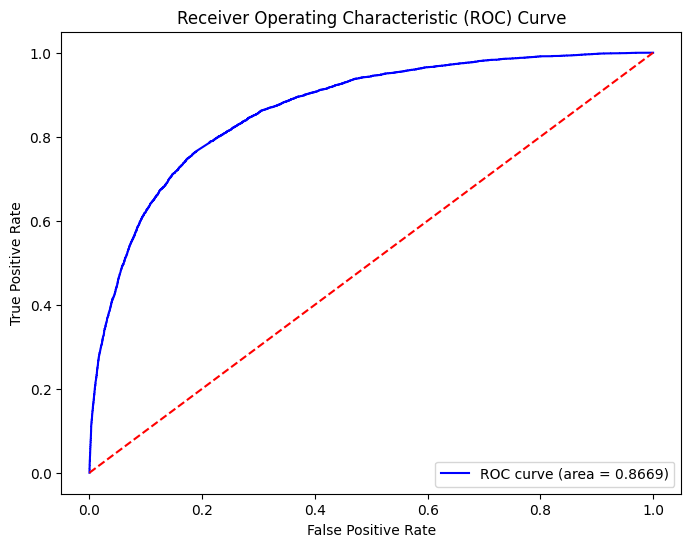

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomNoNo = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

opt_randomNoNo = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_randomNoNo = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_randomNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_randomNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_randomNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_randomNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_randomNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_randomNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_randomNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_randomNoNo.compile(optimizer=opt_randomNoNo, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_randomNoNo = model_randomNoNo.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_randomNoNo.history['loss'], label='Training Loss')
plt.plot(history_randomNoNo.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_randomNoNo.history['accuracy'], label='Training Accuracy')
plt.plot(history_randomNoNo.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_randomNoNo.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.8208 - loss: 0.4101 - val_accuracy: 0.8140 - val_loss: 0.4092
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.8453 - loss: 0.3610 - val_accuracy: 0.8238 - val_loss: 0.3973
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8496 - loss: 0.3552 - val_accuracy: 0.8178 - val_loss: 0.4087
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8511 - loss: 0.3503 - val_accuracy: 0.8246 - val_loss: 0.3991
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8514 - loss: 0.3501 - val_accuracy: 0.8149 - val_loss: 0.4074
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8554 - loss: 0.3454 - val_accuracy: 0.8127 - val_loss: 0.4199
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8543 - loss: 0.3446 - val_accuracy: 0.8125 - val_loss: 0.4139
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8547 - loss: 0

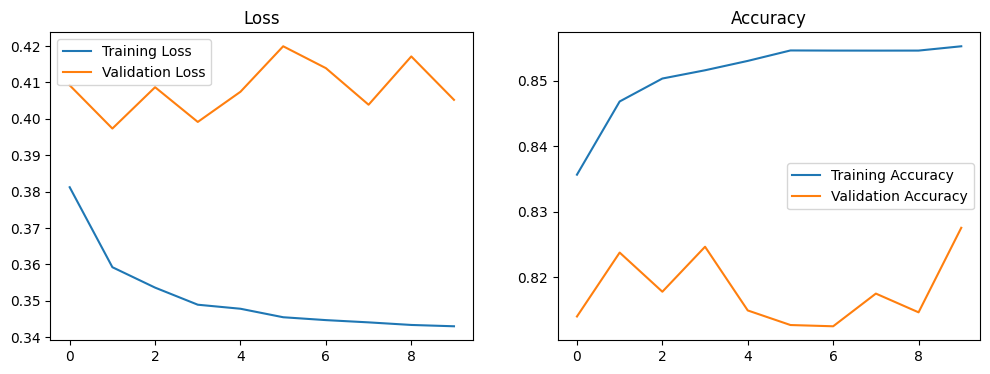

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


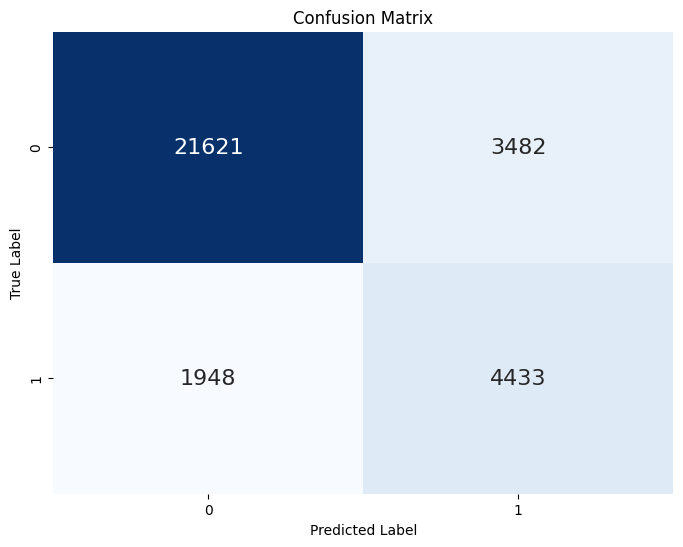

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89     25103
           1       0.56      0.69      0.62      6381

    accuracy                           0.83     31484
   macro avg       0.74      0.78      0.75     31484
weighted avg       0.84      0.83      0.83     31484

ROC-AUC Score: 0.8666


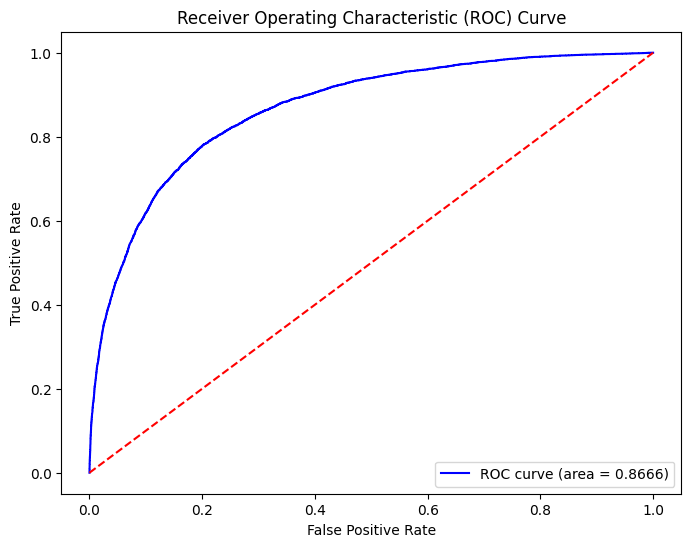

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunNoNo = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

opt_lecunNoNo = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_lecunNoNo = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_lecunNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_lecunNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_lecunNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_lecunNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_lecunNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_lecunNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_lecunNoNo),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_lecunNoNo.compile(optimizer=opt_lecunNoNo, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_lecunNoNo = model_lecunNoNo.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lecunNoNo.history['loss'], label='Training Loss')
plt.plot(history_lecunNoNo.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_lecunNoNo.history['accuracy'], label='Training Accuracy')
plt.plot(history_lecunNoNo.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_lecunNoNo.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

